In [19]:
# import libraries
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.models import load_model
from keras.optimizers import Adam, SGD
from keras.applications.vgg16 import VGG16
from keras.applications.efficientnet import EfficientNetB7

In [5]:
# define location of dataset
folder = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/train/'
train_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataset_dogs_cats_butterfly/train/'
test_path = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataset_dogs_cats_butterfly/test/'

In [3]:
# create directories
dataset_home = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/dataset_dogs_cats_butterfly/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/', 'butterfly']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'C:/Users/vitorugo/Downloads/dogs-vs-cats/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)
    elif file.startswith('butterfly'):
        dst = dataset_home + dst_dir + 'butterfly/'  + file
        copyfile(src, dst)

VGG 1

Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
> 72.759


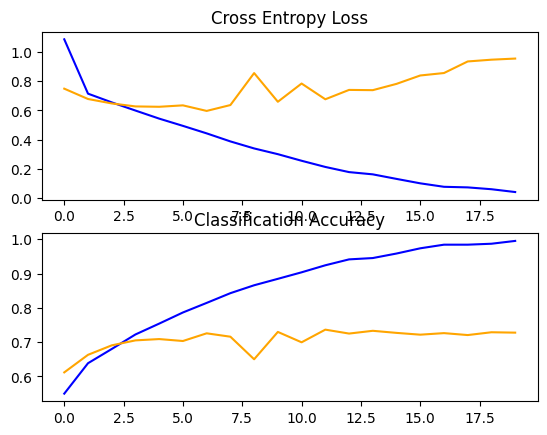

In [6]:
# define cnn model (VGG1)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG 2

Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
> 75.099


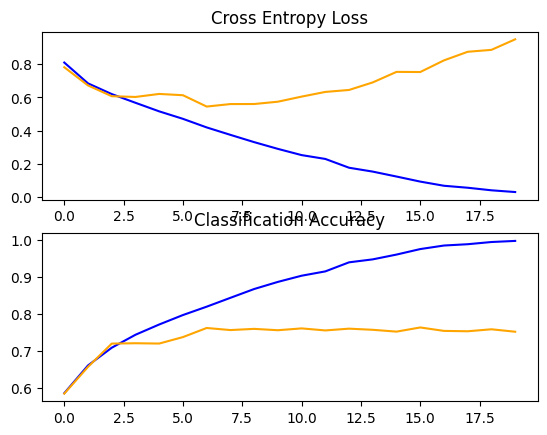

In [7]:
# define cnn model (VGG2)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG 3

Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
> 79.453


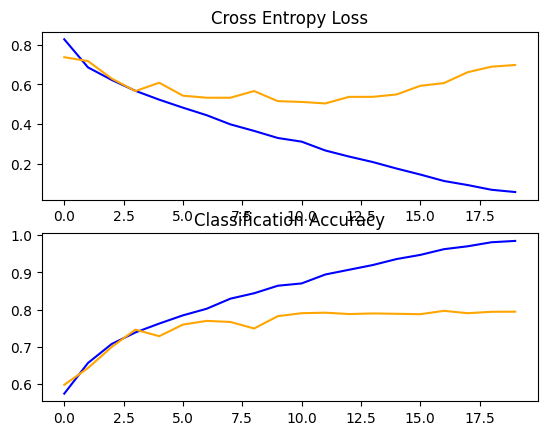

In [8]:
# define cnn model (VGG3)
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Dropout Regularization

Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
> 74.605


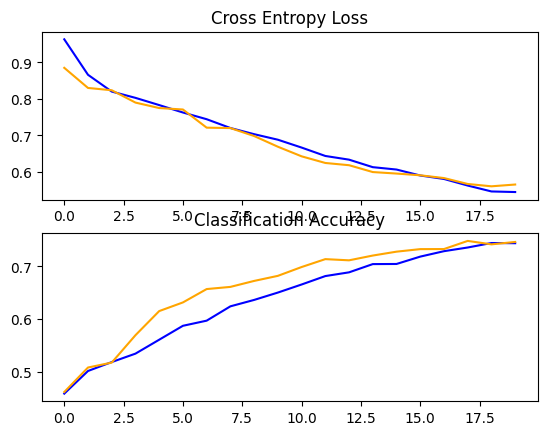

In [9]:
# baseline model with dropout for the dogs vs cats dataset
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.5))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Image Data Augmentation

Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
> 86.499


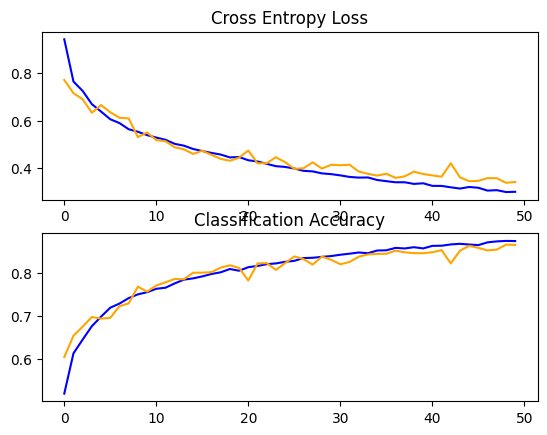

In [18]:
# baseline model with data augmentation for the dogs vs cats dataset
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(train_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(test_path,
		class_mode='categorical', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

VGG16

Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
Epoch 1/10
331/331 [==============================] - 2919s 9s/step - loss: 0.7434 - accuracy: 0.9594 - val_loss: 0.0889 - val_accuracy: 0.9694
Epoch 2/10
331/331 [==============================] - 3052s 9s/step - loss: 0.0436 - accuracy: 0.9852 - val_loss: 0.0749 - val_accuracy: 0.9773
Epoch 3/10
331/331 [==============================] - 3164s 10s/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0855 - val_accuracy: 0.9772
Epoch 4/10
331/331 [==============================] - 3336s 10s/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0927 - val_accuracy: 0.9782
Epoch 5/10
331/331 [==============================] - 3366s 10s/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1033 - val_accuracy: 0.9780
Epoch 6/10
331/331 [==============================] - 3393s 10s/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1118 - val_accuracy: 0.9787
Epoch 7/10
331/331 [===========================

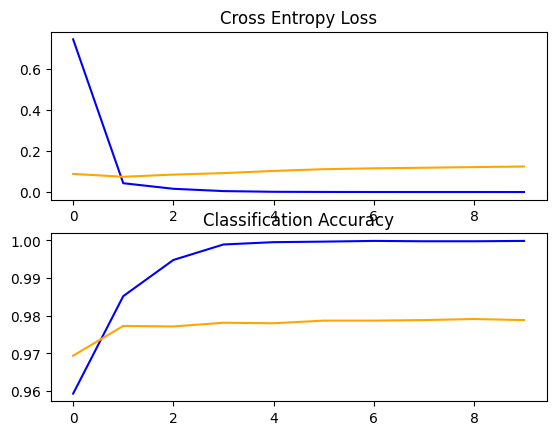

In [17]:
# VGG16 model used for transfer learning on the dogs and cats dataset

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	# cganging the output layer to predict 3 classes (dog, cat and butterfly)
	output = Dense(3, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	# changing the loss for multiclass classifications
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(train_path,
		class_mode="categorical", batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory(test_path,
		class_mode="categorical", batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

EfficientNetB7

473176280/473176280 [==============================] - 8s 0us/step
Found 21157 images belonging to 3 classes.
Found 7096 images belonging to 3 classes.
Epoch 1/10
331/331 [==============================] - 6239s 19s/step - loss: 0.1574 - accuracy: 0.9726 - val_loss: 0.0586 - val_accuracy: 0.9825
Epoch 2/10
331/331 [==============================] - 6378s 19s/step - loss: 0.0631 - accuracy: 0.9870 - val_loss: 0.0637 - val_accuracy: 0.9845
Epoch 3/10
331/331 [==============================] - 6398s 19s/step - loss: 0.0360 - accuracy: 0.9901 - val_loss: 0.0921 - val_accuracy: 0.9765
Epoch 4/10
331/331 [==============================] - 6280s 19s/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0645 - val_accuracy: 0.9858
Epoch 5/10
331/331 [==============================] - 8771s 27s/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.0760 - val_accuracy: 0.9841
Epoch 6/10
331/331 [==============================] - 6085s 18s/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0622 -

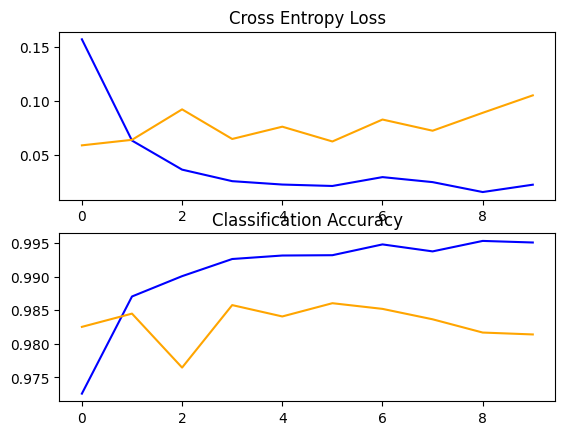

In [20]:
# EfficientNetB7 model used for transfer learning on the dogs and cats dataset

# define cnn model
def define_model():
	# load model
	model = EfficientNetB7(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	# cganging the output layer to predict 3 classes (dog, cat and butterfly)
	output = Dense(3, activation='softmax')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = Adam(learning_rate=0.001)
	# changing the loss for multiclass classifications
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory(train_path,
		class_mode="categorical", batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory(test_path,
		class_mode="categorical", batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()